In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Решение систем линейных алгебраических уравнений итерационными методами

Дана система уравнений $Ax = b$. Найти решение системы с помощью метода Гаусса. Выполнить 10 итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения.

In [88]:
A = [[118.8, -14, -5, -89.1], 
     [-14.85, -20, -5, 0], 
     [297, 16, 320, 0], 
     [0, 6, -30,-36.3]]

b = [444.5, -41.05, -635, 209.3]

x = np.linalg.solve(A, b) 
print('Точное решение системы:', x)

Точное решение системы: [ 2.09090909  1.5        -4.         -2.21212121]


In [197]:
# преобразование системы к виду x = Bx + c
B = np.zeros((len(A), len(A)))
c = np.zeros(len(b))

for i in range(len(A)):
    c[i] = b[i] / A[i][i]
    for j in range(len(A)):
        B[i][j] = -A[i][j] / A[i][i]
        B[i][i] = 0

In [5]:
# проверка сходимости метода Зейделя
np.linalg.norm(B, np.inf)

0.9924999999999999

In [199]:
B1 = np.copy(B)
B2 = np.copy(B)

for i in range(len(A)):
    B1[i, i+1:] = 0
    B2[i, :i+1] = 0

In [153]:
def seidel(B, c, x0):
    n = len(B)
    x = x0
    
    for it in range(11):
        xk = np.copy(x)
        for i in range(n):
            s1 = sum(np.dot(B[i][j], xk[j]) for j in range(i))
            s2 = sum(np.dot(B[i][j], x[j]) for j in range(i + 1, n))
            xk[i] = (s1 + s2 + c[i])
        x = xk
    return x

In [92]:
x1 = seidel(B, c, np.zeros(4))
print('Приближенное решение системы методом Зейделя:', x1)

Приближенное решение системы методом Зейделя: [ 2.09131868  1.49989631 -4.00037497 -2.21182846]


In [87]:
# абсолютная погрешность итерационного решения
np.linalg.norm(x - x1, np.inf)

0.00040958979442340393

In [93]:
x2 = seidel(B, c, np.ones(4))
print('Приближенное решение системы методом Зейделя:', x2)

Приближенное решение системы методом Зейделя: [ 2.09161395  1.49982156 -4.00064528 -2.21161742]


In [94]:
# абсолютная погрешность итерационного решения
np.linalg.norm(x - x2, np.inf)

0.0007048635176469809

Дана система уравнений $x = Bx + c$, где $B=B(t), t = -1, -0.8, \ldots, 0.8, 1$ --- параметр. Построить график (или гистограмму) зависимости нормы $\|B\|_{\infty}$ от параметра $t$. По графику определить, при каких перечисленных выше значениях $t$ выполнено достаточное условие сходимости итерационных методов. Найти решение системы $x = Bx + c$ с точностью $\epsilon = 10^{-5}$ для наибольшего значения параметра $t$, при котором выполнено условие сходимости.

In [221]:
def B(t):
    return [[0.2, 0.3, np.sin(3 * np.pi * t)], [0.1, -0.25, 0.3], [0.2, 0.1, 0.3]]

In [222]:
c = [1, 2, 1]

In [223]:
t = np.linspace(-1, 1, 11)

In [142]:
norm = []

for elem in t:
    norm.append(np.linalg.norm(B(elem), np.inf))

norm

[0.6499999999999999,
 1.4510565162951536,
 1.0877852522924734,
 1.0877852522924722,
 1.4510565162951536,
 0.6499999999999999,
 1.4510565162951532,
 1.0877852522924742,
 1.0877852522924725,
 1.4510565162951536,
 0.6499999999999999]

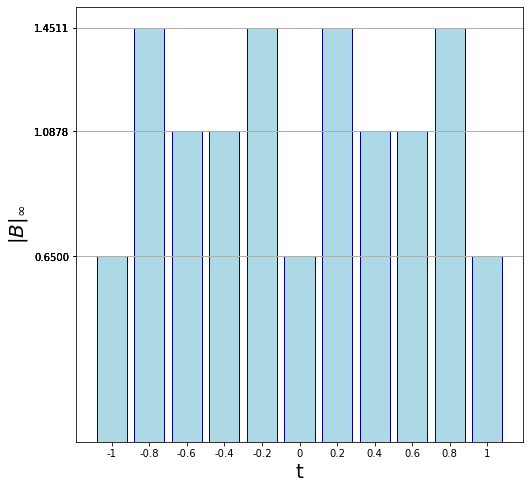

In [138]:
plt.figure(figsize=(8, 8))
plt.bar(np.arange(len(norm)), norm, color='lightblue', edgecolor='darkblue')
plt.grid(True, axis='y')
plt.yticks(norm)
plt.xticks(np.arange(len(norm)), [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.xlabel('t', fontsize=20)
plt.ylabel('$\|B\|_{\infty}$', fontsize=20)
plt.show()

In [224]:
[x for x in norm if x<1]

[0.6499999999999999, 0.6499999999999999, 0.6499999999999999]

In [156]:
def seidel1(B, c, x0, eps):
    n = len(B)
    x = x0
    it = 0
    
    converge = False
    while not converge:
        xk = np.copy(x)
        for i in range(n):
            s1 = sum(np.dot(B[i][j], xk[j]) for j in range(i))
            s2 = sum(np.dot(B[i][j], x[j]) for j in range(i + 1, n))
            xk[i] = (s1 + s2 + c[i])
        
        converge = np.linalg.norm(xk - x) <= eps
        x = xk
        it += 1
    return (x, it)

In [225]:
print(seidel1(B(1), c, np.zeros(len(B(1))), 10e-5))

(array([1.80043037, 2.66811088, 1.62689716]), 8)


Дана система уравнений $Ax=b$, где $A$ -- симметричная положительно определенная матрица размерности $n\times n$. Найти решение системы с помощью итерационного метода со спектрально эквивалентным оператором.

In [17]:
n = 50

b = np.zeros(n)
A = np.zeros((n, n))
for i in range(n):
    A[i][i] = 1000
    A[i][(i+1)%n] = 450
    A[i][(i+9)%n] = 1
    A[i][(i+13)%n] = 13
    A[i, :i] = 0
    b[i] = 100 * (i+1)**2

In [18]:
np.linalg.solve(A, b)

array([-9.24633011e-02,  5.39152117e-02,  3.36744626e-01,  7.56447029e-01,
        1.31233810e+00,  2.00551095e+00,  2.83427980e+00,  3.80112091e+00,
        4.90262095e+00,  6.14309753e+00,  7.51770754e+00,  9.03103025e+00,
        1.06795684e+01,  1.24660276e+01,  1.43870769e+01,  1.64479370e+01,
        1.86400969e+01,  2.09781499e+01,  2.34366201e+01,  2.60590653e+01,
        2.87738125e+01,  3.16928476e+01,  3.46536508e+01,  3.78669060e+01,
        4.11069360e+01,  4.45404906e+01,  4.80872463e+01,  5.18065065e+01,
        5.56086506e+01,  5.96303961e+01,  6.36372147e+01,  6.80764623e+01,
        7.20854164e+01,  7.72904345e+01,  8.07209512e+01,  8.75511579e+01,
        8.94528725e+01,  9.78886757e+01,  1.03040590e+02,  1.08636512e+02,
        1.13857529e+02,  1.19983269e+02,  1.25370513e+02,  1.32287749e+02,
        1.36249448e+02,  1.47223450e+02,  1.43059000e+02,  1.72980000e+02,
        1.27600000e+02,  2.50000000e+02])

$\frac{V(x^{(n+1)}-x^{(n)})}{\tau}+A x^{(n)}=b$

$V(x^{(n+1)}-x^{(n)})+\tau Ax^{(n)}=b\tau$

$Vx^{(n+1)}=Vx^{(n)}-\tau V^{-1}Ax^{(n)}+V^{-1}b\tau$

$x^{(n+1)}=x^{(n)}(E-\tau V^{-1}A)+V^{-1}b\tau$

In [29]:
E = np.zeros((n, n))
for i in range(n):
    E[i][i] = 1

V = np.random.randint(1500, size=(n, n))
V = (V + V.T) / 2
eigvals, eigvecs = np.linalg.eig(V)
V = eigvecs.dot(np.diag(np.abs(eigvals))).dot(eigvecs.T)

m1 = np.linalg.eigvals(np.dot(np.linalg.inv(V), A)).min()
M1 = np.linalg.eigvals(np.dot(np.linalg.inv(V), A)).max()

m = np.linalg.eigvals(A).min()
M = np.linalg.eigvals(A).max()

print(m1, M1)

np.dot(np.dot(np.ones(n), A), np.ones(n)) / np.dot(np.dot(np.ones(n), V), np.ones(n)) 

(0.038521784981609096+0j) (41.634592580985284+0j)


0.03871230842796179

In [30]:
tau = 2 / (m1 + M1)
tau

(0.0479925733996338+0j)

In [35]:
def method_with_operator(x, eps):
    converge = False
    it = 0
    while not converge:
        xk = np.dot(E - tau * np.dot(np.linalg.inv(V), A), x) + tau * np.dot(np.linalg.inv(V), b)
        converge = np.linalg.norm(xk - x) <= eps
        x = xk
        it += 1
    return (x, it)

In [36]:
method_with_operator(np.zeros(n), 10e-5)

(array([-9.24953181e-02+0.j,  5.38744186e-02+0.j,  3.36703428e-01+0.j,
         7.56415031e-01+0.j,  1.31231080e+00+0.j,  2.00548420e+00+0.j,
         2.83425748e+00+0.j,  3.80107753e+00+0.j,  4.90259049e+00+0.j,
         6.14306419e+00+0.j,  7.51766117e+00+0.j,  9.03100240e+00+0.j,
         1.06795327e+01+0.j,  1.24659872e+01+0.j,  1.43870489e+01+0.j,
         1.64479067e+01+0.j,  1.86400567e+01+0.j,  2.09781036e+01+0.j,
         2.34366039e+01+0.j,  2.60590319e+01+0.j,  2.87737634e+01+0.j,
         3.16928181e+01+0.j,  3.46536168e+01+0.j,  3.78668858e+01+0.j,
         4.11068899e+01+0.j,  4.45404547e+01+0.j,  4.80872058e+01+0.j,
         5.18064743e+01+0.j,  5.56086131e+01+0.j,  5.96303718e+01+0.j,
         6.36371935e+01+0.j,  6.80764185e+01+0.j,  7.20853883e+01+0.j,
         7.72904037e+01+0.j,  8.07209401e+01+0.j,  8.75511315e+01+0.j,
         8.94528514e+01+0.j,  9.78886504e+01+0.j,  1.03040562e+02+0.j,
         1.08636480e+02+0.j,  1.13857504e+02+0.j,  1.19983235e+02+0.j,
      